Prepare the Data

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (60000, 784)
y_train shape: (60000, 10)
X_test shape: (10000, 784)
y_test shape: (10000, 10)


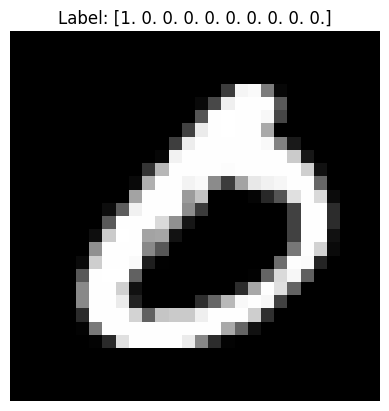

In [20]:
import matplotlib.pyplot as plt

# Choose a sample index to visualize -> This code shows a sample fos us to see the specific data depend on the sample index
sample_index = 2121

# Reshape the sample to its original shape (28x28) for visualization
sample_image = X_train[sample_index].reshape(28, 28)

# Visualize the sample
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {y_train[sample_index]}')
plt.axis('off')
plt.show()


Model Neural Network

In [9]:
import numpy as np

class Model:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1, self.W2 = self.initialize_weights(input_size, hidden_size, output_size)

  def sigmoid(self, x):
    # Activation function
    return 1/(1+np.exp(-x))

  def sigmoid_derivative(self, x):
    # Derivative of the sigmoid function
    return x * (1 - x)

  def initialize_weights(self, input_size, hidden_size, output_size):
    # Initialize weights randomly with a mean of 0
    W1 = np.random.randn(input_size, hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    return W1, W2

  def forward_propagate(self, X):
    # Feed forward input X through a network
    H = self.sigmoid(np.dot(X, self.W1))
    Y = self.sigmoid(np.dot(H, self.W2))
    return H, Y


  def back_propagate(self, X, H, Y, y_true):
    # Back propagate errors and update weights
    m = X.shape[0]
    error = Y - y_true
    dW2 = (1/m) * np.dot(H.T, error)
    dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
    dW1 = (1/m) * np.dot(X.T, dH)
    return dW1, dW2

  def update_weights(self, dW1, dW2, learning_rate):
    # Update weights using gradient descent
    self.W1 -= learning_rate * dW1
    self.W2 -= learning_rate * dW2

  def cross_entropy_loss(self, Y_pred, Y_true):
    # Calculate cross-entropy loss
    m = Y_true.shape[0]
    loss = -1/m * np.sum(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))
    return loss

  def optimize(self, X, y_true, num_epochs, learning_rate, batch_size):
    for epoch in range(num_epochs):
      # Shuffle data
      shuffled_indices = np.random.permutation(X.shape[0])
      X = X[shuffled_indices]
      y_true = y_true[shuffled_indices]

      # Split data into mini-batches
      num_batches = X.shape[0] // batch_size
      for batch_index in range(num_batches):
        start_index = batch_index * batch_size
        end_index = start_index + batch_size
        X_batch = X[start_index:end_index]
        y_batch = y_true[start_index:end_index]

        # Feed forward
        H, Y = self.forward_propagate(X_batch)

        predictions = np.argmax(Y, axis=1)
        loss = self.cross_entropy_loss(Y, y_batch)
        accuracy = np.mean(predictions == np.argmax(y_batch, axis=1))

        # Back propagate
        dW1, dW2 = self.back_propagate(X_batch, H, Y, y_batch)

        # Update weights
        self.update_weights(dW1, dW2, learning_rate)
      print('Epoch: {} - Loss: {} - Accuracy: {}'.format(epoch, loss, accuracy))
    return

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define your Model class (assuming it has all necessary methods)
class Model:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1, self.W2 = self.initialize_weights(input_size, hidden_size, output_size)
    
    def initialize_weights(self, input_size, hidden_size, output_size):
        W1 = np.random.randn(input_size, hidden_size)
        W2 = np.random.randn(hidden_size, output_size)
        return W1, W2

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagate(self, X):
        H = self.sigmoid(np.dot(X, self.W1))
        Y = self.sigmoid(np.dot(H, self.W2))
        return H, Y

    def back_propagate(self, X, H, Y, y_true):
        m = X.shape[0]
        error = Y - y_true
        dW2 = (1 / m) * np.dot(H.T, error)
        dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
        dW1 = (1 / m) * np.dot(X.T, dH)
        return dW1, dW2

    def update_weights(self, dW1, dW2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.W2 -= learning_rate * dW2

    def cross_entropy_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = -1 / m * np.sum(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))
        return loss

    def optimize(self, X, y_true, num_epochs, learning_rate, batch_size):
        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X = X[shuffled_indices]
            y_true = y_true[shuffled_indices]#Shuffle dữ liệu 
            num_batches = X.shape[0] // batch_size
            for batch_index in range(num_batches):
                start_index = batch_index * batch_size
                end_index = start_index + batch_size
                X_batch = X[start_index:end_index]
                y_batch = y_true[start_index:end_index]
                H, Y = self.forward_propagate(X_batch)
                loss = self.cross_entropy_loss(Y, y_batch)
                dW1, dW2 = self.back_propagate(X_batch, H, Y, y_batch)
                self.update_weights(dW1, dW2, learning_rate)
                predictions = np.argmax(Y, axis=1)
                accuracy = np.mean(predictions == np.argmax(y_batch, axis=1))
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_index+1}/{num_batches}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
        print('Training finished.')

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create model
model = Model(input_size=784, hidden_size=128, output_size=10)

# Train model
model.optimize(X_train, y_train, num_epochs=10, learning_rate=0.01, batch_size=64)

# Evaluate model
H, Y = model.forward_propagate(X_test)
predictions = np.argmax(Y, axis=1)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Batch 1/937, Loss: 41.7298, Accuracy: 0.0625
Epoch 1/10, Batch 2/937, Loss: 44.6507, Accuracy: 0.1250
Epoch 1/10, Batch 3/937, Loss: 41.4380, Accuracy: 0.0938
Epoch 1/10, Batch 4/937, Loss: 39.6647, Accuracy: 0.1406
Epoch 1/10, Batch 5/937, Loss: 38.6871, Accuracy: 0.0781
Epoch 1/10, Batch 6/937, Loss: 37.8338, Accuracy: 0.1094
Epoch 1/10, Batch 7/937, Loss: 36.3505, Accuracy: 0.1094
Epoch 1/10, Batch 8/937, Loss: 34.1629, Accuracy: 0.1094
Epoch 1/10, Batch 9/937, Loss: 32.6066, Accuracy: 0.1250
Epoch 1/10, Batch 10/937, Loss: 29.7524, Accuracy: 0.1094
Epoch 1/10, Batch 11/937, Loss: 29.8876, Accuracy: 0.0781
Epoch 1/10, Batch 12/937, Loss: 30.2205, Accuracy: 0.1250
Epoch 1/10, Batch 13/937, Loss: 28.9492, Accuracy: 0.0312
Epoch 1/10, Batch 14/937, Loss: 26.5288, Accuracy: 0.0938
Epoch 1/10, Batch 15/937, Loss: 26.6865, Accuracy: 0.0781
Epoch 1/10, Batch 16/937, Loss: 26.1779, Accuracy: 0.0156
Epoch 1/10, Batch 17/937, Loss: 22.9965, Accuracy: 0.1094
Epoch 1/10, Batch 18/93

NameError: name 'data' is not defined